# Iris dataset
***

The Iris dataset is a study done by the the statistician and biologist Ronald Fisher in the year of 1936. It consist in the observation of iris flowers and I will analyse it in this project.
https://en.wikipedia.org/wiki/Iris_flower_data_set

![iris_setosa](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/256px-Kosaciec_szczecinkowaty_Iris_setosa.jpg) *Fig. 1 Iris setosa*
![iris_versicolor](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/256px-Iris_versicolor_3.jpg) *Fig. 2 Iris versicolor*
![iris_virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/256px-Iris_virginica.jpg)*Fig. 3 iris virginica*

*All photos were taken in Wikipedia in the link above*

This notebook is a detailed explanation of my Python script, [analysis.py](analysis.py), and it also contains a comparison with other studies.

## Loading data
***
In order to analyse this data set, I downloaded it through the following link. Then I extracted the files from zip file into my pands-project folder.
https://archive.ics.uci.edu/dataset/53/iris
Now to import the data into the script, I need to use Pandas library. Pandas includes many important tools that will use the data for a complete analysis. 
https://pandas.pydata.org/docs/getting_started/overview.html

In [1]:
import pandas as pd

The file iris.data contains the information about the samples, but because it doesn't have column names, I will give the names taking into consideration the file iris.names, where it mentions the attributes of the samples in section 7. If no column names are in place, pandas won't be able to identify the attributes of the samples, because the values don't have labels and that will make impossible to call them.

The code below shows how to create a path for the downloaded data file and a tuple with the column names.
Now to load the data into the script, I use Pandas function pd.read_csv(), with the path of the file plus the column names.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [45]:
path = "./iris/"
logFilename = path + "iris.data"

colNames= ("sepal_length_cm",
    "sepal_width_cm", 
    "petal_length_cm", 
    "petal_width_cm", 
    "class" 
)

df = pd.read_csv(logFilename, names=colNames)

## Summary of the variables
***
In order to do a summary of variables, I request the machine to describe the variables with df.describe() and then create a txt file with that information with the code .to_csv(), with a title, each description in a new line and writing mode to create it.

https://www.w3schools.com/python/pandas/ref_df_describe.asp
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
https://saturncloud.io/blog/how-to-write-a-pandas-dataframe-to-a-txt-file/

In [46]:
a=df.describe()

a.to_csv("Summary of each variable.txt", sep="\t", mode="w")

I copied the details of the txt file in following table:

|     |sepal_length_cm   |sepal_width_cm    |petal_length_cm   |petal_width_cm    |
|-----|------------------|------------------|------------------|------------------|
|count|150.0	         |150.0	            |150.0	           |150.0             |
|mean |5.843333333333334 |3.0540000000000003|3.758666666666666 |1.1986666666666668|
|std  |0.8280661279778629|0.4335943113621737|1.7644204199522617|0.7631607417008414|
|min  |4.3               |2.0               |1.0               |0.1               |
|25%  |5.1	             |2.8	            |1.6	           |0.3               |
|50%  |5.8               |3.0           	|4.35              |1.3               |
|75%  |6.4               |3.3               |5.1               |1.8               |
|max  |7.9	             |4.4	            |6.9               |2.5               |

While analysing the results, I can see information about: 
* count - there's 150 samples; 
* mean - average number registered in the samples;
* std - standard deviation shows how far most of the values are from the mean values;
* min - minimum value registered;
* 25% - percentage of samples that between the minimum values and the value presented;
* 50% - percentage of samples between the values of 25%, exclusive, and 50% inclusive;
* 75% - percentage of samples between the values of 50%, exclusive, and 75% inclusive;
* max - maximum value registered.

## Histograms and bar charts
***
Now for the visualization of the variables, I need Numpy and Matplotlib libraries. [Numpy](https://numpy.org/doc/stable/user/absolute_beginners.html) stores arrays in a easy and fast way and [Matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html) reproduces plots of variables through images.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

Before I try to plot the variables, I need to know their type, because that will be determinant in which kind of plot can be used. In order to get that information I need to use df.dtypes.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html

In [5]:
df.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

Inside of the study there're float and object variables. Now I will simply call one the float variables with variable=df["column_name"] 
and check the arrays with the np.unique. And then I will check same for the object type.
https://www.datacamp.com/tutorial/python-select-columns
https://numpy.org/doc/stable/reference/generated/numpy.unique.html

In [6]:
slen = df["sepal_length_cm"]
values, counts = np.unique(slen, return_counts=True)
values, counts

(array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
        5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
        6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.6, 7.7, 7.9]),
 array([ 1,  3,  1,  4,  2,  5,  6, 10,  9,  4,  1,  6,  7,  6,  8,  7,  3,
         6,  6,  4,  9,  7,  5,  2,  8,  3,  4,  1,  1,  3,  1,  1,  1,  4,
         1], dtype=int64))

In [7]:
s = df["class"]
values2, counts2 = np.unique(s, return_counts=True)
values2, counts2

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50], dtype=int64))

The arrays show that float types cannot be represented in bar charts because the samples are going to be in top of each other, while the histogram can actually be better to represent because many values can be put together in the same interval, so it's easier to analyse. As for the object type, the bar chart can be used because there's only 3 answers inside of it, with a clear number of different class of Iris flowers, as demonstrated above.

### Histogram of variables together
***
To do the histogram, I need to call variables for each attribute. After that I use the function plt.hist() for each variables, with edge colour customization to be easy to identify them, then I add title with plt.title, labels of each axis with ptl.xlabel and ptl.ylabel, a legend with ptl.legend(). To save the histogram as an png file, I use the function plt.savefig(). Finally plot the histogram with plt.show().
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

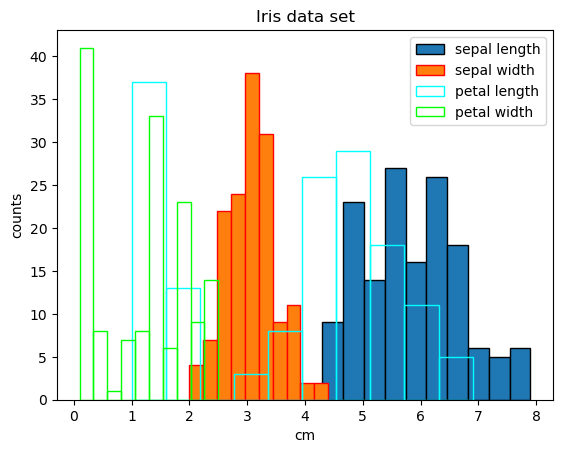

In [29]:
slen = df["sepal_length_cm"]
swid = df["sepal_width_cm"]
plen = df["petal_length_cm"]
pwid = df["petal_width_cm"]

plt.hist(slen, label= "sepal length", edgecolor = "black", fill=True)
plt.hist(swid, label= "sepal width", edgecolor = "red", fill=True)
plt.hist(plen, label= "petal length", edgecolor = "cyan",  fill=False)
plt.hist(pwid, label="petal width", edgecolor = "lime", fill=False)
plt.title("Iris data set")
plt.xlabel("cm")
plt.ylabel("counts")
plt.legend()
#plt.savefig("Histogram with variables together.png") 
plt.show()

### Histograms of each variable
***
There's another possible way to plot the variables in different histograms in a single figure. In this case, I need to call each variable individually in the DataFrame with pd.DataFrame(). Then use the fig, axes = plt.subplots() so I can create a figure with 4 histograms with the layout 2x2 and then size as following. After that I will do a histogram for each variable, choosing the position of with ax=axes[row, column], and with the same edge colour as above. 
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
https://www.tutorialspoint.com/how-to-plot-two-histograms-side-by-side-using-matplotlib
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

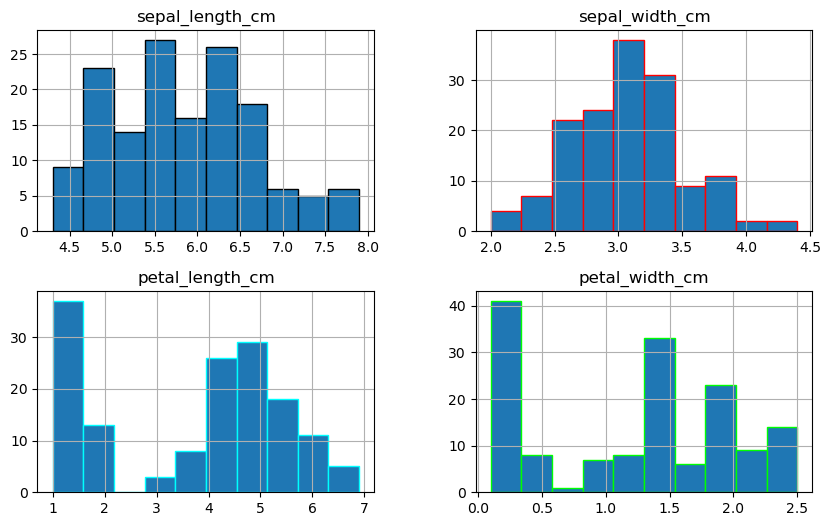

In [9]:
df1 = pd.DataFrame(slen)
df2 = pd.DataFrame(swid)
df3 = pd.DataFrame(plen)
df4 = pd.DataFrame(pwid)

fig, axes = plt.subplots(2,2, figsize=(10, 6))

df1.hist(ax=axes[0, 0], edgecolor = "black")
df2.hist(ax=axes[0, 1], edgecolor = "red")
df3.hist(ax=axes[1, 0], edgecolor = "cyan")
df4.hist(ax=axes[1, 1], edgecolor = "lime")
#plt.savefig("Histograms of each variable.png") 
plt.show()

### Bar chart
***
The only variable in this data set that can be plotted in bar chart is the class of Iris flowers, where there is only 3 possible answers as mentioned above. Then I will use the plt.bar(), with the values and counts done previsously for Iris, then I will custumize the graph with different bar colours, and a title. 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

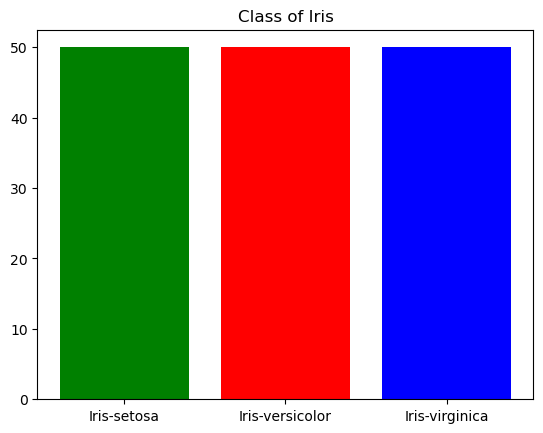

In [10]:
plt.bar(values2, counts2, color=["green", "red","blue"])
plt.title("Class of Iris")
#plt.savefig("Class of Iris bar chart.png")
plt.show()

## Scatter plots
***
Scatter plots show all the samples of called attribute in one figure. I will only consider the floating variable to do the scatter. In order to show all of them, I will use again the plt.subplots() function with the layout 2x3 because there's 4 variables and if we try to put each of them with another, there's a maximum of 6 scatter plots that can be generated. Again I define the position of each scatter plot with axs[row, column].scatter, with edge colour and then add title individually with axs[].set_title.

https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_star_poly.html#sphx-glr-gallery-lines-bars-and-markers-scatter-star-poly-py
https://python-charts.com/correlation/scatter-plot-matplotlib/?utm_content=cmp-true

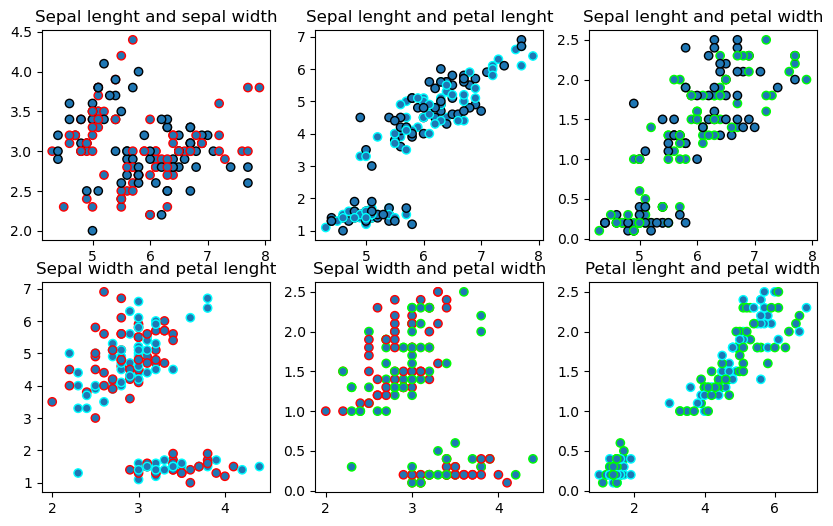

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

axs[0, 0].scatter(slen, swid, edgecolors=["black","red"])
axs[0, 0].set_title("Sepal lenght and sepal width")
axs[0, 1].scatter(slen, plen, edgecolors=["black","cyan"])
axs[0, 1].set_title("Sepal lenght and petal lenght")
axs[0, 2].scatter(slen, pwid, edgecolors=["black","lime"])
axs[0, 2].set_title("Sepal lenght and petal width")
axs[1, 0].scatter(swid, plen, edgecolors=["red","cyan"])
axs[1, 0].set_title("Sepal width and petal lenght")
axs[1, 1].scatter(swid, pwid, edgecolors=["red","lime"])
axs[1, 1].set_title("Sepal width and petal width")
axs[1, 2].scatter(plen, pwid, edgecolors=["cyan","lime"])
axs[1, 2].set_title("Petal lenght and petal width")
plt.show()

## Correlation
***
There other ways to explore the data, correlation can show very intesting fact about the study, because it shows if the variables can have a relation between them. It can vary between 1 and -1, and the closer is the number to 1 and -1, the stronger is the relation between. If number is close to 0, then the variables have vary weak or no association. To check the correlation, np.corrcoef(1_variable,2_variable)

https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html

In [17]:
print(np.corrcoef(slen, swid))
print(np.corrcoef(slen, plen))
print(np.corrcoef(slen, pwid))
print(np.corrcoef(swid, plen))
print(np.corrcoef(swid, pwid))
print(np.corrcoef(plen, pwid))

[[ 1.         -0.10936925]
 [-0.10936925  1.        ]]
[[1.         0.87175416]
 [0.87175416 1.        ]]
[[1.         0.81795363]
 [0.81795363 1.        ]]
[[ 1.        -0.4205161]
 [-0.4205161  1.       ]]
[[ 1.         -0.35654409]
 [-0.35654409  1.        ]]
[[1.        0.9627571]
 [0.9627571 1.       ]]


The results show that the variables with stronger correlation are: 
* sepal length and petal length with 0.871; 
* sepal length and petal width with 0.817; 
* petal length with petal width with 0.962. 

The weakest are: 
* sepal length and sepal width with -0.109; 
* sepal width and petal length with -0.420; 
* sepal width and petal width with -0.356.

While checking the scatter plot together with the correlation results, the variables with strong relation have plots where most samples are found together, where the weakest have the samples more disperse in the plot.

### Comparison to other studies
***
There's other studies approaching Iris dataset. Dan Alexandru publish in kaggle a simple analysis as well, and  for the correlation he presented the following heat map:

<img src="https://www.kaggleusercontent.com/kf/1397424/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JA4w0wlDIhNuTvOUyia2kQ.0HMS4FS2zx529BC1zP9DEUFXDv24lpqAs60rY1OyKbwqVW65bvSeAQaDwITSbj0h6zy6uID4LWVu-qZNjkZHVm5mG9Tje9X5CRteiXb97l0J810sYcEzCm8pU1hLXH_p9L3gDgP60AfD1-blMkEII2pDyS6RBp3thVBWda6pTqHhHzxpHBUFIRrN5TDyc67MZsRuwD0xqCzPCRzbSUIEzX2Yx6EqNiWZDXbAls9haPDEt7pYBmDPU4p6_goB34xfjZgPA-9nx8nVdQl_1KXoBebK5RHZEzz4j9VyrBbXKO15JUHpgPR_RjpG4BIJIOfCx6dbfjznCKh9BNRepei8GH1Lho4H_gpicIdZYa2UcAV4Aynm6ou5a-fK-Gvkm3zc0zMcBQDrhpO001idB9p2M6PlmNhBMUCXIpVszb4PLC7r7YwdnorEmPwiZ-OFfAjTTtE1XV9ywFu4PrCMuVimWrVUaQLFoXiuh6C3Z6gps1tPIsCLYZOs0Oh3-y1dJ4SzguxWXWsDfgExfpiUd7r_nl_y0FVDVMrY-fl9-vJzOwz1DTar6rbOZwJ3B01yFMcI4s8WJ3x2zbFkg1pPRvgIMt2xvFYbNNS5SUYk8c5AvWfMCdU8pEgz6VReD_pUOoBSpy2y6ukQZap9P84pUggdj66JIWzoey1NWWORxAzRaRs.gGaHIllEHKehObP-pk987w/__results___files/__results___13_3.png" width="500px" height="300px" />

*Image taken from the link above and resized following the Jupyter notebook documentation [regarding images and figures](https://jupyterbook.org/en/stable/content/figures.html#raw-html-images).*

The results obtained are the same, where in the heat map the variables with strong correlation are represented with red and the weak ones as light grey.
https://www.kaggle.com/code/danalexandru/simple-analysis-of-iris-dataset

Another study was done by Xavier, also published in Kaggle, and he presented a figure with the scatter and density plots, and correlation:

<img src="https://www.kaggleusercontent.com/kf/25551327/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..iTO-EYaEuv9WD8qFpqhn-g.wt9X_USZN0M9BoQ0N312vs8LnvHNt2ESXC1WzwhxeYrUPmMAiwcgadh0zcVUV3aosMJuaK1dH2i8yr6Ib1e-b7Zi66iKbxm9BEizPxzONpqhqELKgW_zkr0Shc6kluNI1xj2XwTcZYShNPk5NG-HzKnJK8XBUgq380ueTSw1Kcr4r4HfL2ZzIIQpRDUsvvSdVD4M9QnU6CULzhJmoxdKM-6d8AWvMnYyRtAl3ehAmh3wHIUxB1kPZXyk7m_xcyJ_mALRrb8ZLSnMiBYb3DUo9GaoxGDYFaA2Z5DnIHGjCbxQscTNyPdXjxRecboy0SdPiYV_cfq-XwOISxO2nox637VxC2Q5uvBhvOHS3OJ-Avd3G4tDFEkoyGj996R43wMNmfGwSnyIUBZa9iTIQq8BZAwk2UDV3xsXDzgQOEuBJuQnzy-QgpyA9dMXlOTGQPGTO0v_c9-wASfdbyzrxA09h90WSf9rkrl2OQ-pPneiR-5d1WNgNPydAwGDIl_aUF7dvsdOwI9wqFlJQ6AvzeJEN43vdBVgLIawzErO9JFDvmp5SZhtXzhE2OYWuYpDEbybtqpBwt4MoTufMVZVv_WgwhIdk9_I1nGAP4Ocqr4jdJxhnqMdOM0j0ogwIVV8L_UNwhBKdaiL7ROTk2bTYgp3mQa8fo7CN6WYMDXfpLUNm5Y.bQ_jJwG8ZTIU4iQB7YWAxQ/__results___files/figure-html/unnamed-chunk-10-1.png" width="700px" height="400px" />

*Image taken from the link above.*

This study as well shows same results for the scatter plots and correlation but it also shows more information, with correlation done for each class of Iris as well. When the correlations are done separately by class, these are very different than when all samples are considered. Per example, generally the sepal length and sepal width have a very weak correlation, but when done individually for each class, the correlation is much higher for all of them. In the other hand, the correlation between petal length and petal width that in general is high, when each class is considered, the correlation in way lower, specially in the Virginica and Setosa class. This study shows that in some cases, to get to know more about the samples, a 3rd variable is needed to explain better the correlation since the results of 1 variable can change the results significantly, making a totally different view about the data set. That's why is important to explore the data to be able to explain it and to make better predictions.

https://www.kaggle.com/code/xvivancos/tutorial-knn-in-the-iris-data-set

***
## End